In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from itertools import compress
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC  
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier

In [3]:
df = pd.read_csv("HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [12]:
# Create dummy variables for each of the categorical variables, with 'drop first' to prevent multicollinearity
data = pd.get_dummies(df,drop_first=True)
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,1,0,1,0


In [20]:
X = data.drop('left', 1)
y = data.left
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109)

In [27]:
logreg = LogisticRegression()

# fit the model with data
log_mod = logreg.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
y_pred =logreg.predict(X_test)
print("\n" +'Accuracy of logistic regression classifier on test set: {:.4f} '.format(log_mod.score(X_test, y_test))+ "\n")


Accuracy of logistic regression classifier on test set: 0.7871 



The confusion matrix for this model is:

[[3168  274]
 [ 684  374]]


Text(0.5, 257.44, 'Predicted label')

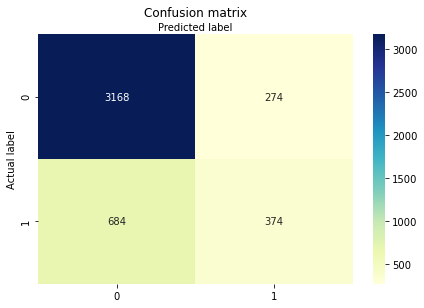

In [32]:
print('The confusion matrix for this model is:' + "\n")
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The classification report for this model is:

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      3442
           1       0.58      0.35      0.44      1058

    accuracy                           0.79      4500
   macro avg       0.70      0.64      0.65      4500
weighted avg       0.76      0.79      0.77      4500

The Log Loss for this model is 7.3530 

The AUC for this model is 0.6369 



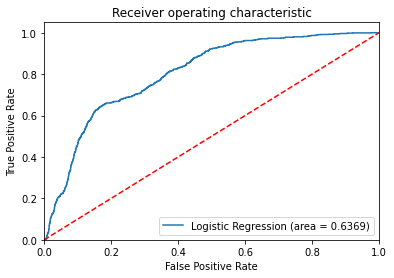

In [33]:
log_reg_precision = round(metrics.precision_score(y_test, y_pred, average='weighted'),2)
log_reg_accuracy = round(metrics.accuracy_score(y_test, y_pred),2)
log_reg_recall = round(metrics.recall_score(y_test, y_pred, average='weighted'),2)
log_reg_f1 = round(metrics.f1_score(y_test, y_pred, average='weighted'),2)
log_reg_loss = round(log_loss(y_test, y_pred, eps=1e-15),2)
log_reg_roc = round(roc_auc_score(y_test, y_pred),2)

print('The classification report for this model is:' + "\n")
print(classification_report(y_test, y_pred))


print('The Log Loss for this model is {:.4f} '.format(log_loss(y_test, y_pred, eps=1e-15))+ "\n")

print('The AUC for this model is {:.4f} '.format(roc_auc_score(y_test, y_pred))+ "\n")

logit_roc_auc = roc_auc_score(y_test, log_mod.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_mod.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.4f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()